In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
from datetime import datetime
import geopandas as gp
from shapely.geometry import Point

from IPython.display import display



In [2]:
%matplotlib inline

In [3]:
plt.rcParams["figure.figsize"] = (10, 5)

In [4]:
saved_style_state = matplotlib.rcParams.copy()  # give us a style state to go back to

In [5]:
if os.path.isfile("nsw_road_crash_data_2018-2022_crash.xlsx"):
    filepath = "nsw_road_crash_data_2018-2022_crash.xlsx"
    print("loading from file")
else:
    filepath = "https://opendata.transport.nsw.gov.au/dataset/06f9cf3d-0a9d-4098-b0f0-fa9efbdd3921/resource/1eba48dd-fa46-4de7-93f7-c33fb18e293b/download/nsw_road_crash_data_2018-2022_crash.xlsx"
    print("loading from the internet")

road_crash_data = pd.read_excel(filepath)
print("done")

loading from file
done


# Car Accidents in NSW (2018 - 2022)

# General Trends

In [6]:
def crash_trends_over_time(road_crash_data):
    road_crash_data.head()
    filtered_data = road_crash_data[road_crash_data['Year_of_crash'] >= 2018].copy()
    filtered_data['Year_of_crash'] = filtered_data['Year_of_crash'].astype(int)
    crashes_per_year = filtered_data.groupby('Year_of_crash').size()

    plt.figure(figsize=(10, 6))
    plt.plot(crashes_per_year.index, crashes_per_year.values, marker='o', linestyle='-', color='blue')

    plt.title('Crash Trends Over Time', fontsize=16)
    plt.xlabel('Year of Crash', fontsize=14)
    plt.ylabel('Number of Crashes', fontsize=14)

    plt.xticks(crashes_per_year.index)

    plt.grid(True)
    plt.show()

    filepath = "nsw_road_crash_data_2018-2022_crash.xlsx"
    road_crash_data = pd.read_excel(filepath)


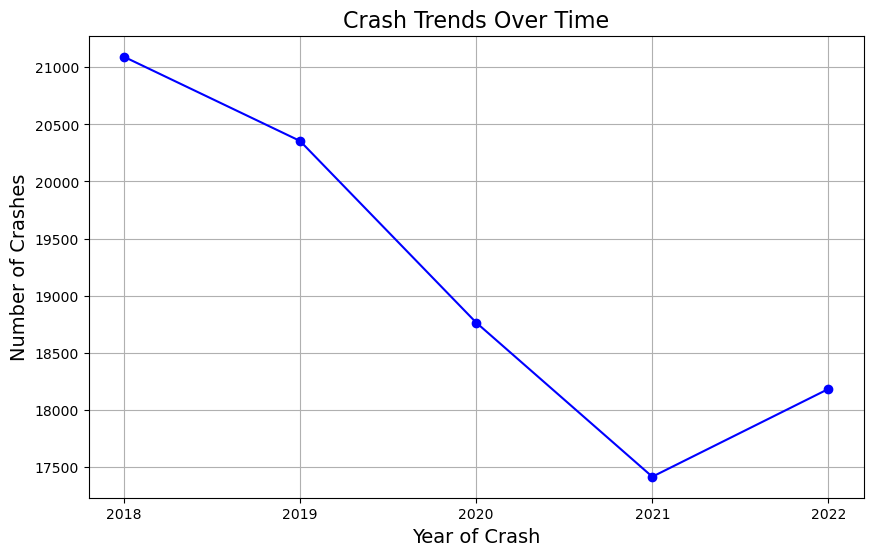

In [7]:
crash_trends_over_time(road_crash_data)

<span style="font-size:0.5em;">2018: Serves as a baseline year before the impact of the COVID-19 pandemic. The crash numbers are relatively higher, reflecting typical traffic patterns and road safety conditions before any major disruptions.</span>

<span style="font-size:0.5em;">2019: The crash numbers in 2019 are slightly lower than in 2018, but still relatively high with only a 3% difference.</span>

<span style="font-size:0.5em;">2020: There is a notable decrease in crashes in 2020 compared to previous years. This drop is largely attributed to the COVID-19 pandemic, which led to strict lockdowns, travel restrictions, and a significant reduction in road traffic. 
Ultimately reducing the number of traffic related accidents.</span>

In [8]:
def crash_per_month_2021(road_crash_data):
    filtered_data = road_crash_data[road_crash_data['Year_of_crash'] == 2021].copy()

    month_mapping = {
        'January': 1, 'February': 2, 'March': 3, 'April': 4,
        'May': 5, 'June': 6, 'July': 7, 'August': 8,
        'September': 9, 'October': 10, 'November': 11, 'December': 12
    }

    filtered_data['Month_of_crash'] = filtered_data['Month_of_crash'].map(month_mapping)

    filtered_data = filtered_data.dropna(subset=['Month_of_crash'])

    filtered_data['Month_of_crash'] = filtered_data['Month_of_crash'].astype(int)

    crashes_per_month = filtered_data.groupby('Month_of_crash').size()

    all_months = pd.DataFrame(index=range(1, 13))
    crashes_per_month = crashes_per_month.reindex(all_months.index, fill_value=0)

    plt.figure(figsize=(10, 6))
    plt.bar(crashes_per_month.index, crashes_per_month.values, color='blue')

    plt.title('Number of Car Crashes per Month for 2021', fontsize=16)
    plt.xlabel('Month', fontsize=14)
    plt.ylabel('Number of Crashes', fontsize=14)

    plt.xticks(ticks=range(1, 13), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])

    plt.grid(True)
    plt.show()

    filepath = "nsw_road_crash_data_2018-2022_crash.xlsx"
    road_crash_data = pd.read_excel(filepath)


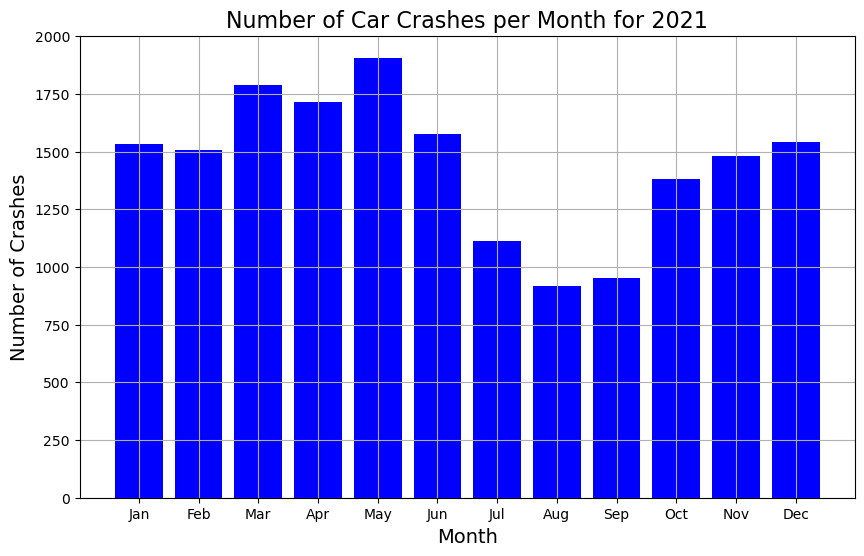

In [9]:
crash_per_month_2021(road_crash_data)

<span style="font-size:0.5em;">2021: The number of crashes continues to decline in 2021, though not as sharply as in 2020. This indicates ongoing impacts from the pandemic. As for the dip in July to September this is when lockdown was reintroduced only for us to be let free again in October, leading to a spike in traffic accidents.</span>

<span style="font-size:0.5em;">2022: There is a slight uptick in crashes in 2022 compared to 2021. This increase reflects a partial return to pre-pandemic traffic levels as restrictions eased and people resumed more typical travel patterns.</span>

<span style="font-size:0.5em;">With more businesses reopening and people returning to normal routines, traffic volumes increased, leading to a rise in the number of crashes.</span>

In [10]:
def crashes_per_two_hours(road_crash_data):
    crashes_per_interval = road_crash_data['Two_hour_intervals'].value_counts().sort_index()

    plt.figure(figsize=(10, 6))
    plt.bar(crashes_per_interval.index, crashes_per_interval.values, color='blue')

    plt.title('Number of Car Crashes per Two-Hour Interval (2018–2022)', fontsize=16)
    plt.xlabel('Two-Hour Interval', fontsize=14)
    plt.ylabel('Number of Crashes', fontsize=14)

    plt.xticks(rotation=60)
    plt.grid(True)
    plt.show()
    
    filepath = "nsw_road_crash_data_2018-2022_crash.xlsx"
    road_crash_data = pd.read_excel(filepath)

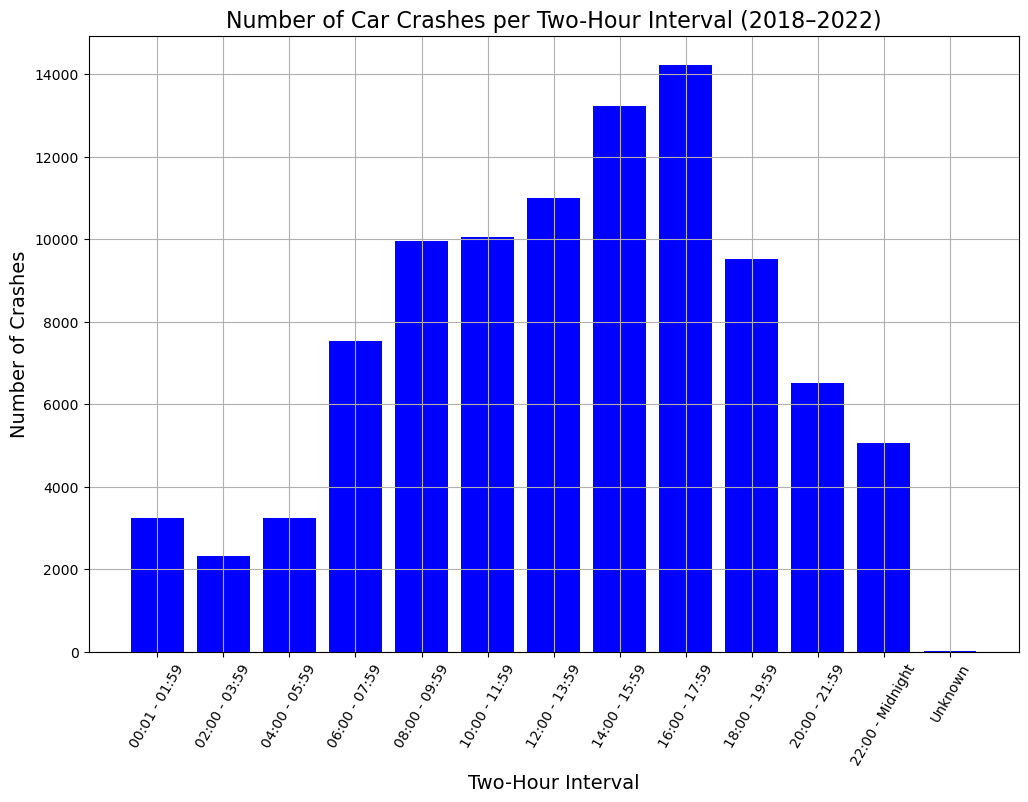

In [11]:
crashes_per_two_hours(road_crash_data)

<span style="font-size:0.5em;">As shown from the graphs above the number of crashes tend to most frequently occur during 2pm - 6pm. This could be due to the high influx of cars on the road during this time, with parents on their way to pick up their children from school and people making the commune back home from work.</span>

In [12]:
def severe_crashes(road_crash_data):

    severe_crash_types = ['Fatal', 'Seriously Injured']
    severe_crashes = road_crash_data[road_crash_data['Degree_of_crash'].isin(severe_crash_types)]

    severe_crashes_per_interval = severe_crashes['Two_hour_intervals'].value_counts().sort_index()

    total_crashes_per_interval = road_crash_data['Two_hour_intervals'].value_counts().sort_index()

    proportion_severe = severe_crashes_per_interval / total_crashes_per_interval

    plt.figure(figsize=(18, 8))

    plt.subplot(1, 2, 1)
    plt.bar(severe_crashes_per_interval.index, severe_crashes_per_interval.values, color='red')
    plt.title('Number of Severe Crashes per Two-Hour Interval (2018–2022)', fontsize=16)
    plt.xlabel('Two-Hour Interval', fontsize=14)
    plt.ylabel('Number of Severe Crashes', fontsize=14)
    plt.xticks(rotation=70)
    plt.grid(True)

    plt.subplot(1, 2, 2)
    plt.bar(proportion_severe.index, proportion_severe.values, color='orange')
    plt.title('Proportion of Severe Crashes per Two-Hour Interval (2018–2022)', fontsize=16)
    plt.xlabel('Two-Hour Interval', fontsize=14)
    plt.ylabel('Proportion of Severe Crashes', fontsize=14)
    plt.xticks(rotation=70)
    plt.grid(True)

    plt.tight_layout()
    plt.show()

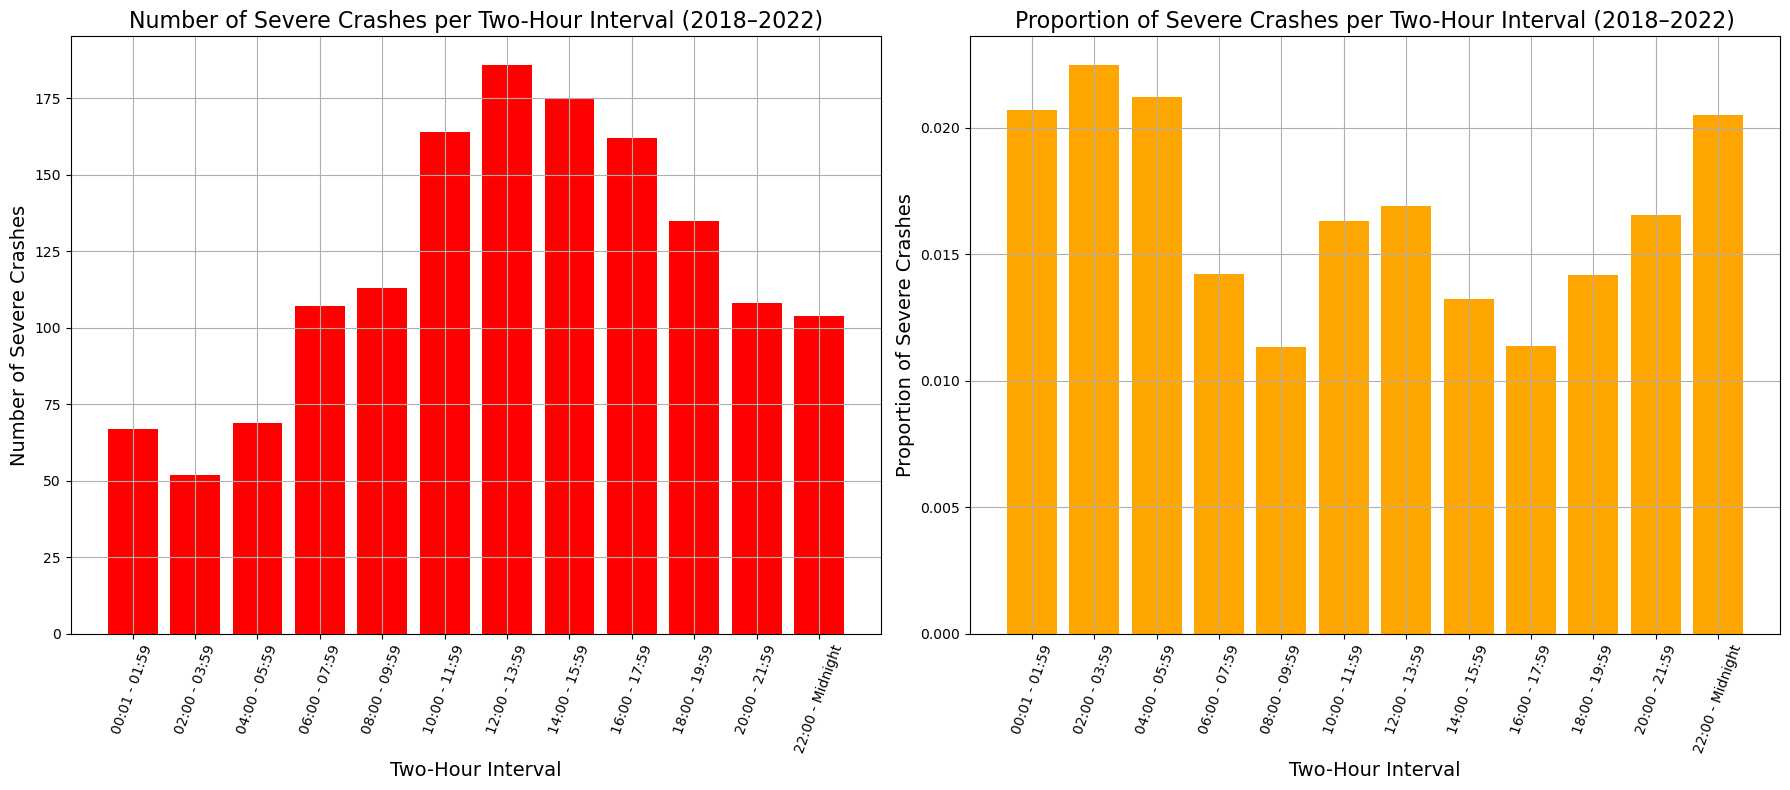

In [13]:
severe_crashes(road_crash_data)

<span style="font-size:0.5em;">Whilst the number of severe crashes (classified as fatal or seriously injured) is directly tied to the total number of crashes under a given time. Crashes occuring between 10pm - 6am show a higher proportion of severity relative to their frequency. This is likely due to individuals under the influnce of drugs and alcohol, paired with limited visiblity of the road.</span>

In [14]:
def total_crashes_per_week(road_crash_data):
    severe_crash_types = ['Fatal', 'Seriously Injured']

    severe_crashes = road_crash_data[road_crash_data['Degree_of_crash'].isin(severe_crash_types)]

    total_crashes_per_day = road_crash_data['Day_of_week_of_crash'].value_counts()
    severe_crashes_per_day = severe_crashes['Day_of_week_of_crash'].value_counts()

    days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
    total_crashes_per_day = total_crashes_per_day.reindex(days_order)
    severe_crashes_per_day = severe_crashes_per_day.reindex(days_order)

    plt.figure(figsize=(14, 6))

    plt.subplot(1, 2, 1)
    plt.bar(total_crashes_per_day.index, total_crashes_per_day.values, color='blue')
    plt.title('Total Number of Crashes by Day of the Week (2018–2022)', fontsize=16)
    plt.xlabel('Day of the Week', fontsize=14)
    plt.ylabel('Number of Crashes', fontsize=14)
    plt.xticks(rotation=45)
    plt.grid(True)

    plt.subplot(1, 2, 2)
    plt.bar(severe_crashes_per_day.index, severe_crashes_per_day.values, color='red')
    plt.title('Number of Severe Crashes by Day of the Week (2018–2022)', fontsize=16)
    plt.xlabel('Day of the Week', fontsize=14)
    plt.ylabel('Number of Severe Crashes', fontsize=14)
    plt.xticks(rotation=45)
    plt.grid(True)

    plt.tight_layout()
    plt.show()

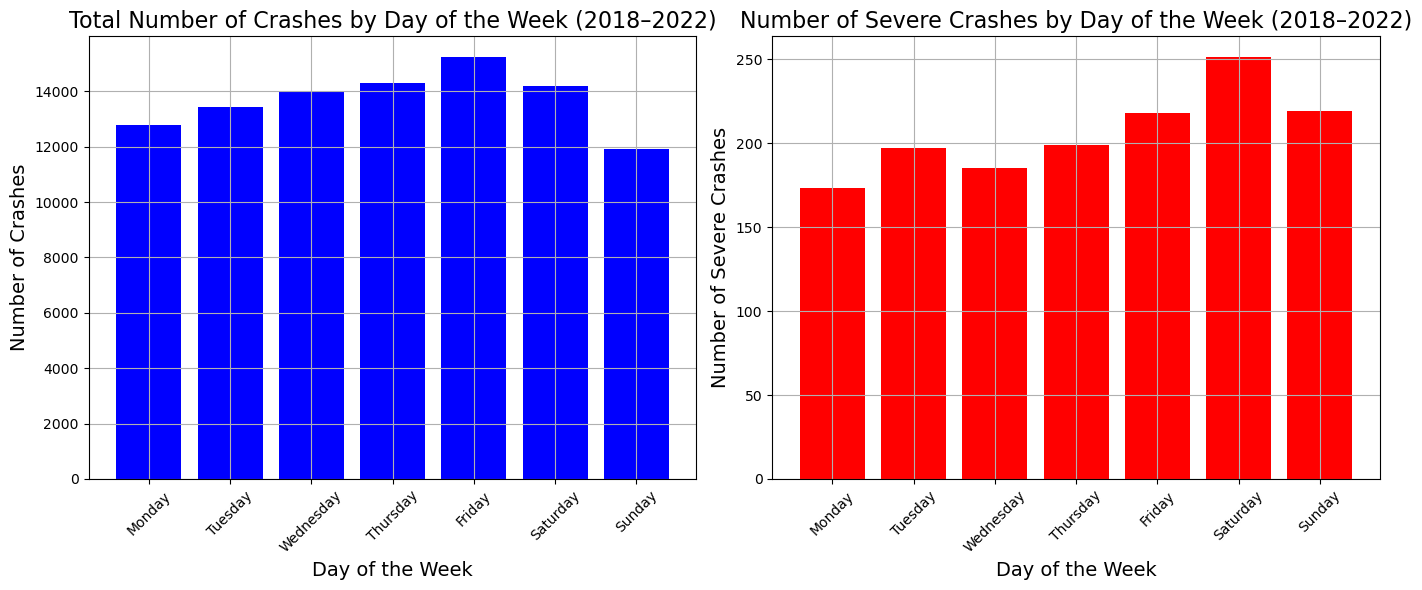

In [15]:
total_crashes_per_week(road_crash_data)

<span style="font-size:0.5em;">The data shows that the frequency of crashes during the week seem to be quite constant with Friday being slightly higher than the rest, possibly due to it being "The end of the working week". Whilst, Sunday is surprisingly the day with the least accdients, this could be caused by people recovering after being hungover from the previous 2 nights.</span>

<span style="font-size:0.5em;">However, the number of severe crashes occur during the most on Fridays and the weekends, with saturday having the most. This is likely due to the fact that most proportianally severe crashes occur during early mornings where indiviudals would party late at night on Fridays and get into accidents on the way home early into Saturday morning.</span>

# Location-Based

In [50]:
def crashes_by_total_LGA():
    crashes_per_lga = road_crash_data['LGA'].value_counts()

    plt.figure(figsize=(14, 8))
    crashes_per_lga[:20].plot(kind='bar', color='green') 
    # print("Top 20 LGAs with the Highest Number of Crashes (2018–2022):")
    # print(crashes_per_lga.head(20))
    plt.title('Number of Car Crashes by LGA (2018–2022)', fontsize=16)
    plt.xlabel('LGA', fontsize=14)
    plt.ylabel('Number of Crashes', fontsize=14)
    plt.xticks(rotation=80)
    plt.grid(True)

    plt.show()

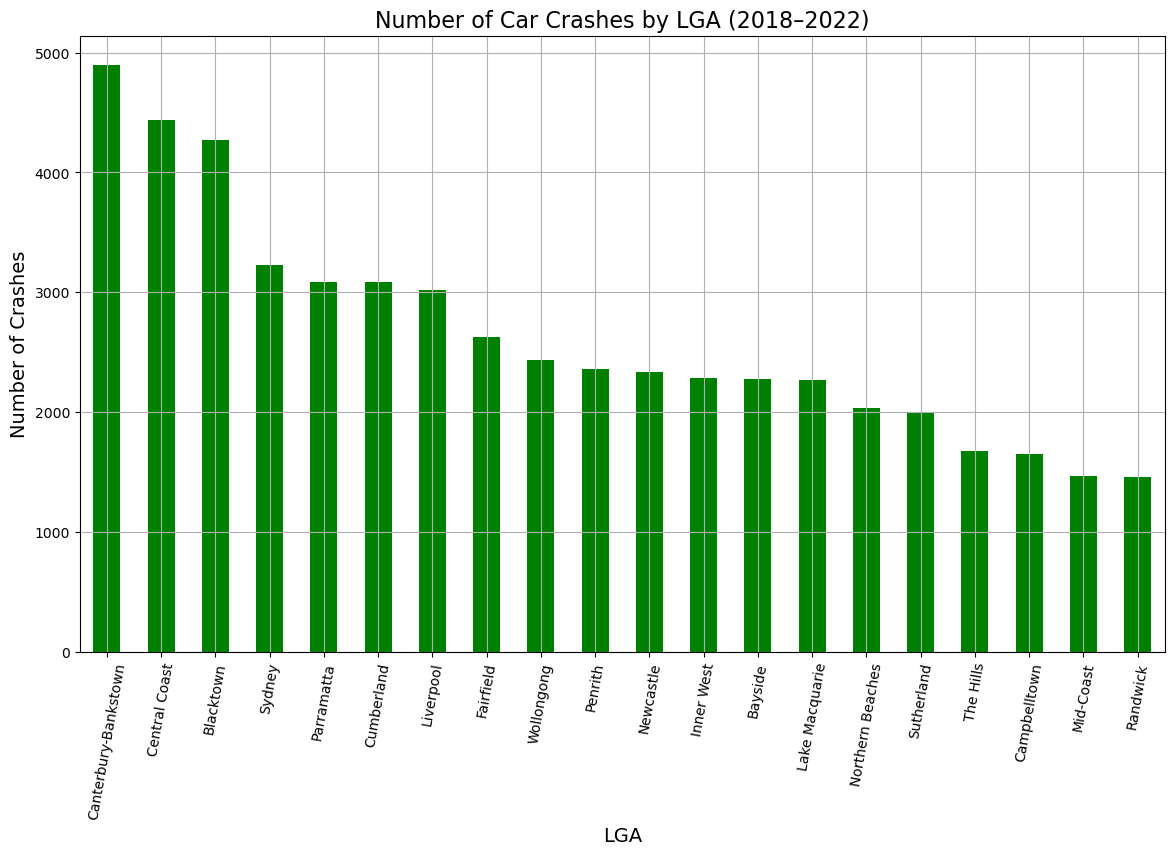

In [51]:
crashes_by_total_LGA()

<span style="font-size:0.5em;">The LGAs with the highest number of crashes are experiencing higher crash rates due to increased population density and urbanisation. As these areas grow and develop, more vehicles are on the roads, leading to a higher likelihood of traffic accidents.</span>

In [42]:
def total_number_of_urbanised_crashes():
    crashes_by_urbanization = road_crash_data['Urbanisation'].value_counts()

    plt.figure(figsize=(12, 8))
    crashes_by_urbanization.plot(kind='bar', color='purple')

    plt.title('Number of Car Crashes by Urbanisation Level (2018–2022)', fontsize=16)
    plt.xlabel('Urbanisation Level', fontsize=14)
    plt.ylabel('Number of Crashes', fontsize=14)
    plt.xticks(rotation=45)
    plt.grid(True)

    plt.show()


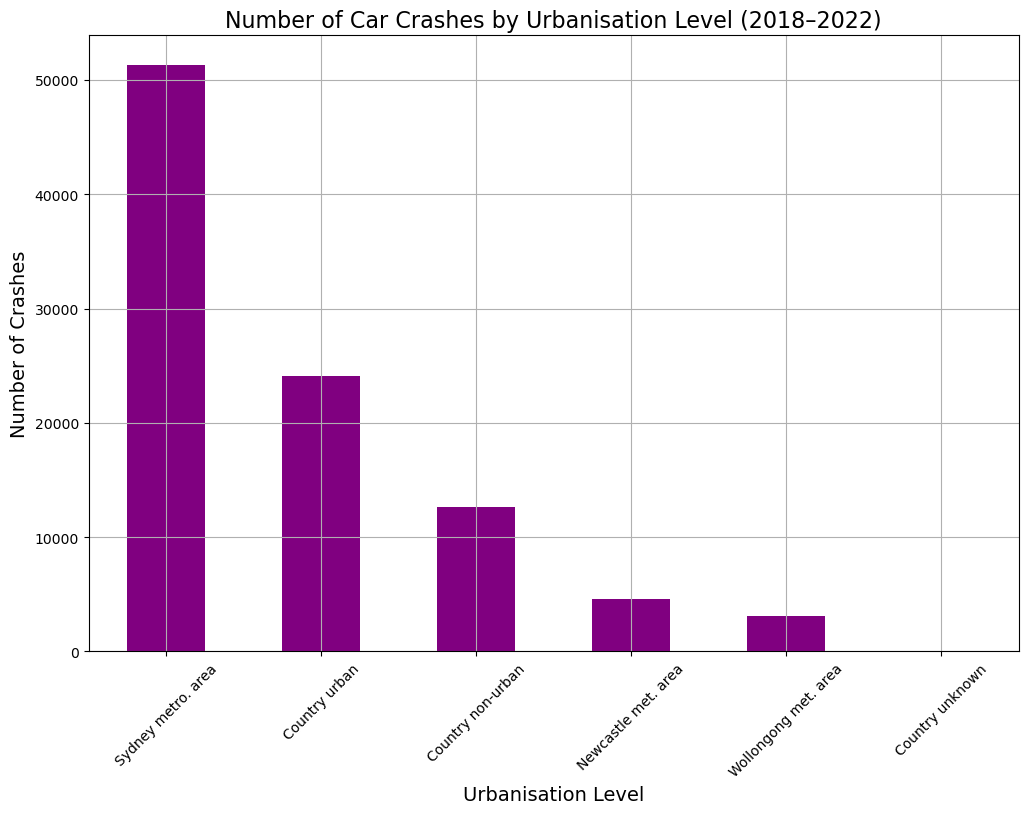

In [43]:
total_number_of_urbanised_crashes()

<span style="font-size:0.5em;">Crashes that occured in different levels of urbanisation, the Sydney metro area seems to have the most by a large margin due to it being relatively close together and people dense compared to the other locations.</span>

In [69]:
from matplotlib.lines import Line2D

def nsw_map_crash():
    shp_file_name = "GDA2020/nsw_localities.shp" 
    crash_data_filepath = "nsw_road_crash_data_2018-2022_crash.xlsx"  

    burbs = gp.read_file(shp_file_name)

    target_suburbs = [
        "Canterbury-Bankstown", "Central Coast", "Blacktown", "Sydney",
        "Parramatta", "Cumberland", "Liverpool", "Fairfield", "Wollongong",
        "Penrith", "Newcastle", "Inner West", "Bayside", "Lake Macquarie",
        "Northern Beaches", "Sutherland", "The Hills", "Campbelltown",
        "Mid-Coast", "Randwick"
    ]

    burbs_filtered = burbs[burbs['LOC_NAME'].isin(target_suburbs)]

    crash_data = pd.read_excel(crash_data_filepath)

    crash_gdf = gp.GeoDataFrame(
        crash_data,
        geometry=gp.points_from_xy(crash_data['Longitude'], crash_data['Latitude']),
        crs="EPSG:4326"
    )

    if burbs.crs != crash_gdf.crs:
        crash_gdf = crash_gdf.to_crs(burbs.crs)

    crashes_in_target_suburbs = gp.sjoin(crash_gdf, burbs_filtered, how="inner", predicate='within')

    fig, ax = plt.subplots(figsize=(12, 12))

    burbs.plot(ax=ax, color='lightgrey', edgecolor='green', linewidth=1.0, alpha=0.5)
    burbs_filtered.plot(ax=ax, color='lightblue', edgecolor='green', linewidth=2.0)
    crashes_in_target_suburbs.plot(ax=ax, color='red', markersize=10, alpha=0.6, edgecolor='k')

    plt.title('Crashes and Suburb Boundaries in Sydney', fontsize=16)
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')

    legend_elements = [
        Line2D([0], [0], marker='o', color='w', markerfacecolor='red', markersize=10, label='Crashes'),
    ]
    ax.legend(handles=legend_elements, loc='upper right')

    plt.grid(True)
    plt.show()


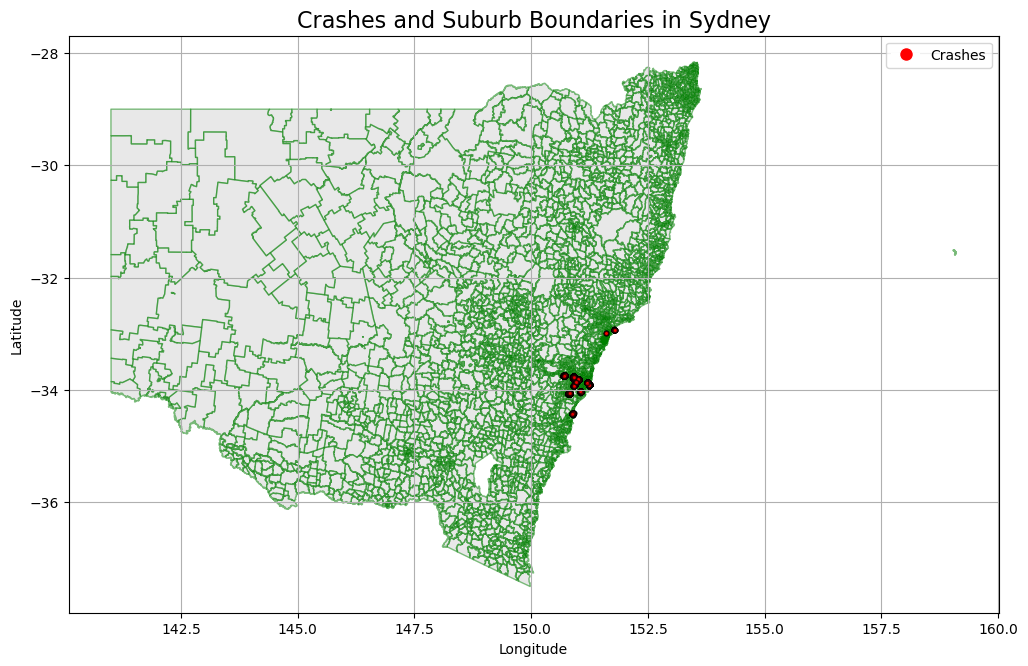

In [68]:
nsw_map_crash()


<span style="font-size:0.5em;">The plotted crashes here are actually thousands of crashes on top of each other, however they are from the top 20 suburbs with the most crashes. Which leads you to question why the top 20 suburbs take up such a small portion of NSW. Well its quite simple the combination of high population density, economic activity, extensive transport networks, and rapid development in these suburbs creates an environment where the volume of traffic and complexity of road usage leads to a higher number of traffic accidents.</span>

# Road Conditions

In [151]:
def road_condition_graph():
    crash_data_filepath = "nsw_road_crash_data_2018-2022_crash.xlsx"
    crash_data = pd.read_excel(crash_data_filepath)

    filtered_crash_data = crash_data[
        ~crash_data['Surface_condition'].isin(['Snow or Ice', 'Unknown']) &
        ~crash_data['Street_lighting'].isin(['Unknown', 'Nil'])
    ]

    road_condition_counts = filtered_crash_data['Surface_condition'].value_counts()
    road_condition_severity = filtered_crash_data.groupby(['Surface_condition', 'Degree_of_crash']).size().unstack(fill_value=0)

    street_lighting_counts = filtered_crash_data['Street_lighting'].value_counts()
    street_lighting_severity = filtered_crash_data.groupby(['Street_lighting', 'Degree_of_crash']).size().unstack(fill_value=0)

    fig, ax = plt.subplots(1, 2, figsize=(14, 6))

    road_condition_counts.plot(kind='bar', ax=ax[0], color='skyblue')
    ax[0].set_title('Number of Crashes by Surface Condition')
    ax[0].set_xlabel('Surface Condition')
    ax[0].set_ylabel('Number of Crashes')

    road_condition_severity.plot(kind='bar', stacked=True, ax=ax[1], colormap='viridis')
    ax[1].set_title('Severity of Crashes by Surface Condition')
    ax[1].set_xlabel('Surface Condition')
    ax[1].set_ylabel('Number of Crashes')

    plt.tight_layout()
    plt.show()

    fig, ax = plt.subplots(1, 2, figsize=(14, 6))

    street_lighting_counts.plot(kind='bar', ax=ax[0], color='orange')
    ax[0].set_title('Number of Crashes by Street Lighting')
    ax[0].set_xlabel('Street Lighting')
    ax[0].set_ylabel('Number of Crashes')

    street_lighting_severity.plot(kind='bar', stacked=True, ax=ax[1], colormap='plasma')
    ax[1].set_title('Severity of Crashes by Street Lighting')
    ax[1].set_xlabel('Street Lighting')
    ax[1].set_ylabel('Number of Crashes')

    plt.tight_layout()
    plt.show()


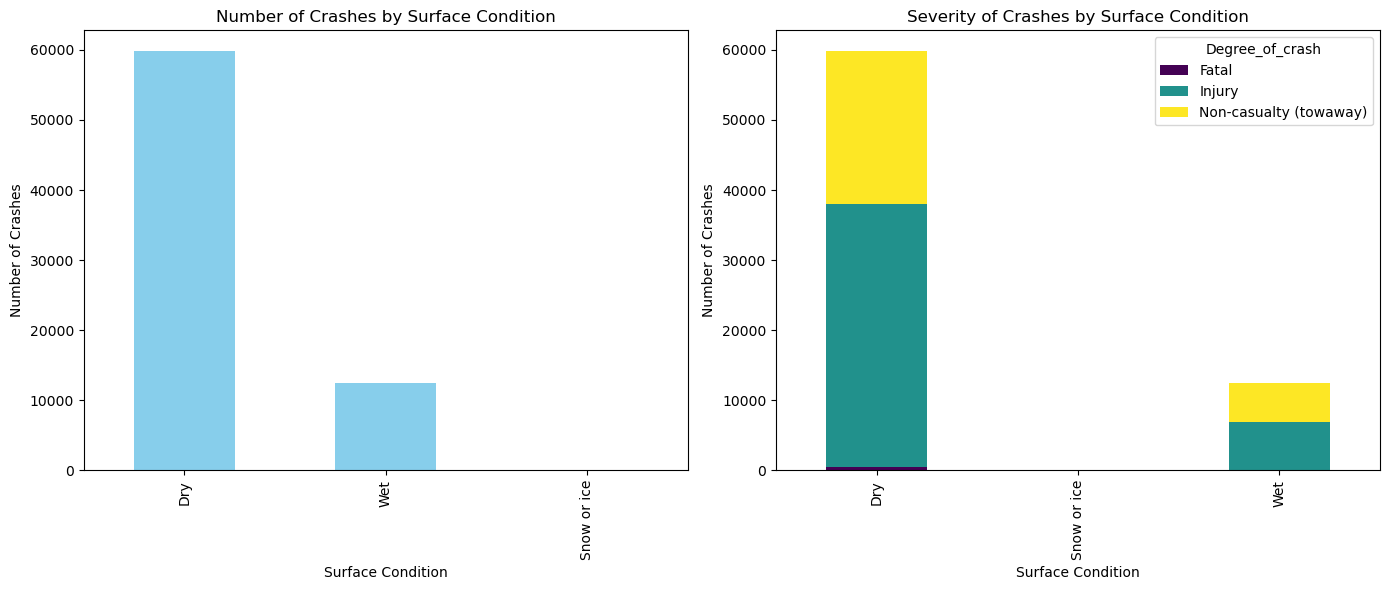

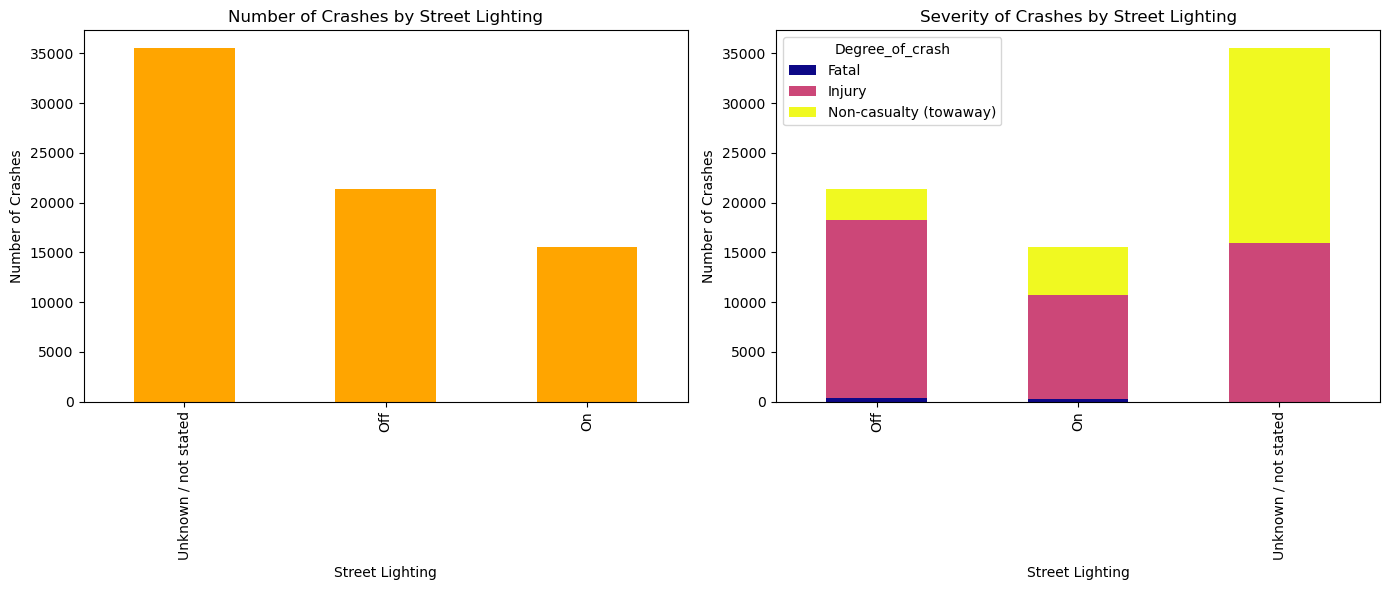

In [152]:
road_condition_graph()

<span style="font-size:0.5em;">As seen here the number of crashes when the roads are wet is about 5 times less than when it's dry. This could be beacuse it isn't raining as much as it is dry and people are actively driving more safely when the roads are wet. However, you'd think that because its during wet weather the crashes would be more severe but turns out that proportinally both result in about the same percentage of severe crashes.</span>

<span style="font-size:0.5em;">With street lighting though, about a 30% increase in crashes whilst the lights are off. Unlike road conditions many more severe accidents are caused when the lights are off. Who would've guessed seeing the road was actually useful when driving.</span>

# Crash Characteristics


<span style="font-size:0.5em;">Alright lets see who the menaces of the road are, the following presents types of vehicles which CAUSED the accident.</span>

In [97]:
def top_15_tu():
    if 'Key_TU_type' in road_crash_data.columns:
        tu_counts = road_crash_data['Key_TU_type'].dropna().value_counts()

        top_15_tu_counts = tu_counts.head(15)

        plt.figure(figsize=(14, 8))  
        top_15_tu_counts.plot(kind='bar', color='skyblue')
        plt.title('Top 15 Traffic Units Involved in Crashes')
        plt.xlabel('Traffic Unit Type')
        plt.ylabel('Frequency')
        plt.xticks(rotation=45, ha='right')  
        plt.tight_layout()  
        plt.show()


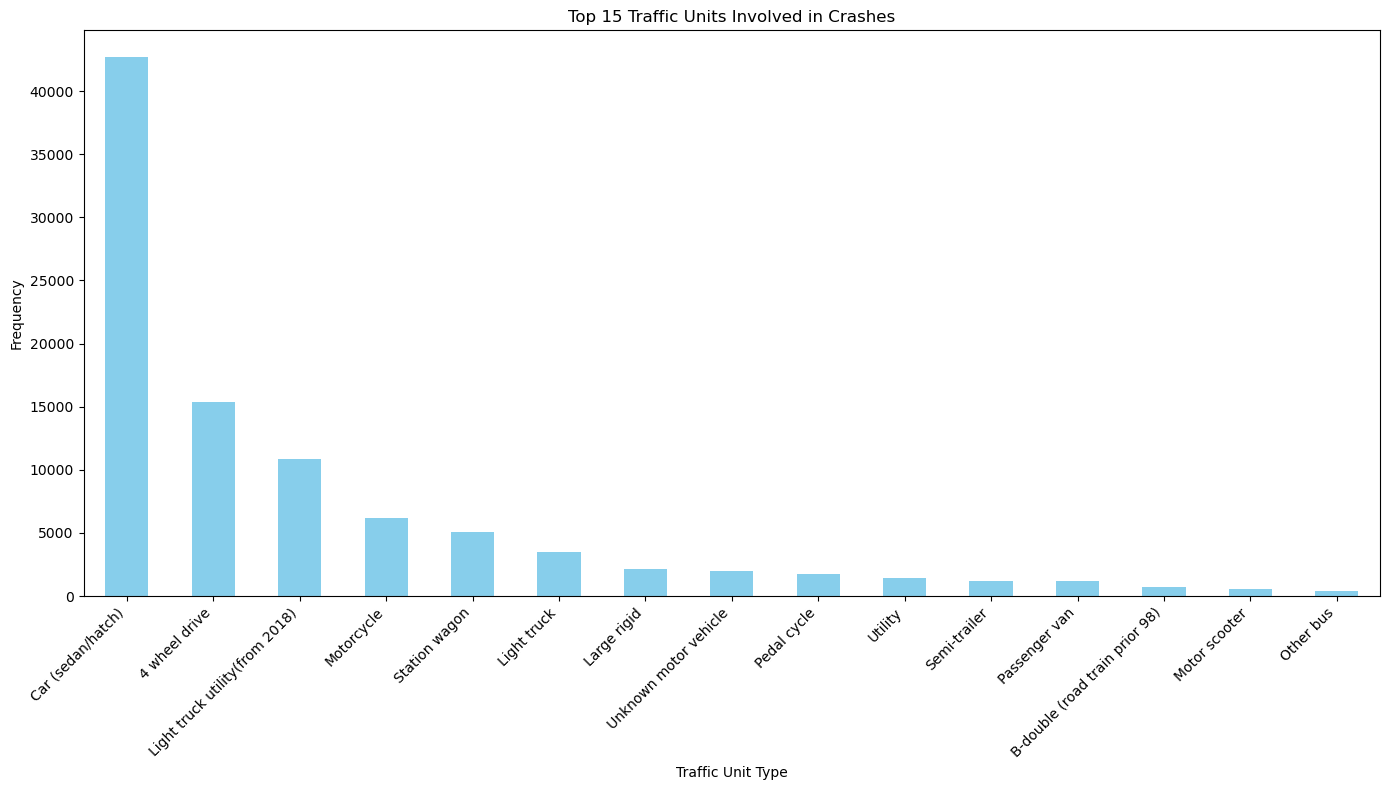

In [98]:
top_15_tu()

<span style="font-size:0.5em;">As we can see the ordinary car is the biggest culprit when it comes to car accidents followed by 4 wheel drives and light utility truck and motorcycles, all the popular forms of vehicles amongst the public. However, the proportional amount of severe crashes tells a different story.</span>

In [95]:
def plot_proportional_severe_crashes():
    """
    Plot the proportion of severe crashes involving the top 15 traffic unit types.
    
    Parameters:
    road_crash_data (pd.DataFrame): The dataset containing crash data.
    """
    severe_crash_types = ['Fatal', 'Seriously Injured']
    
    severe_crashes = road_crash_data[road_crash_data['Degree_of_crash'].isin(severe_crash_types)]
    
    if severe_crashes.empty:
        print("No severe crashes found in the dataset.")
        return
    
    severe_tu_counts = severe_crashes['Key_TU_type'].dropna().value_counts()
    
    if severe_tu_counts.empty:
        print("No traffic unit types found in severe crashes.")
        return
    
    top_15_severe_tu_counts = severe_tu_counts.head(15)
    
    total_severe_crashes = len(severe_crashes)
    top_15_severe_tu_proportions = (top_15_severe_tu_counts / total_severe_crashes) * 100
    
    plt.figure(figsize=(14, 8))
    top_15_severe_tu_proportions.plot(kind='bar', color='orange')
    plt.title('Proportion of Severe Crashes by Traffic Unit Type')
    plt.xlabel('Traffic Unit Type')
    plt.ylabel('Proportion (%)')
    plt.xticks(rotation=45, ha='right')  
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.tight_layout()  
    plt.show()

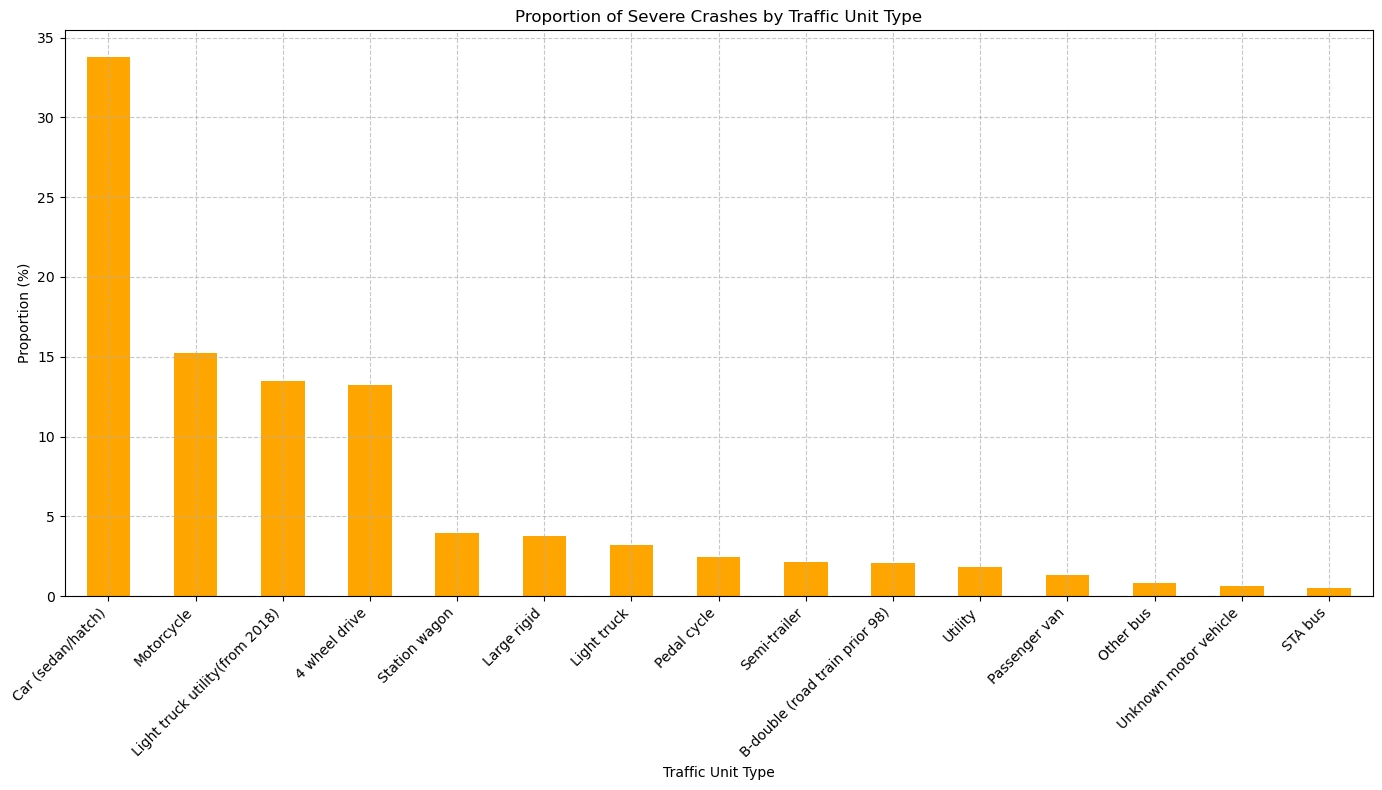

In [96]:
plot_proportional_severe_crashes()

<span style="font-size:0.5em;">No, no it doesn't cars still sit on top with more than double the next highest, that of which is the motorcycle which jumped up from 4th place, for how small you guys are, you cause quite a lot of trouble. Following this is the light utility truck and 4 wheel drive which sit about the same.</span>

In [149]:
def plot_crashes_by_speed_limit():
    if 'Speed_limit' not in road_crash_data.columns:
        raise ValueError("The 'Speed_limit' column is missing from the data")

    road_crash_data['Speed_limit'] = road_crash_data['Speed_limit'].str.replace(' km/h', '', regex=False)
    speed_limit_crashes = road_crash_data.groupby('Speed_limit').size().reset_index(name='crash_count')
    speed_limit_crashes = speed_limit_crashes[speed_limit_crashes['Speed_limit'].str.lower() != 'unknown']
    speed_limit_crashes['Speed_limit'] = pd.to_numeric(speed_limit_crashes['Speed_limit'], errors='coerce')
    speed_limit_crashes = speed_limit_crashes.dropna(subset=['Speed_limit'])
    speed_limit_crashes['Speed_limit'] = speed_limit_crashes['Speed_limit'].astype(int)
    speed_limit_crashes = speed_limit_crashes.sort_values('Speed_limit')

    plt.figure(figsize=(10, 6))
    plt.bar(speed_limit_crashes['Speed_limit'], speed_limit_crashes['crash_count'], color='skyblue', width=8)
    plt.xlabel('Speed Limit')
    plt.ylabel('Number of Crashes')
    plt.title('Number of Crashes by Speed Limit')
    plt.xticks(range(min(speed_limit_crashes['Speed_limit']) // 10 * 10,
                   max(speed_limit_crashes['Speed_limit']) + 10,
                   10))
    plt.tight_layout()
    plt.show()

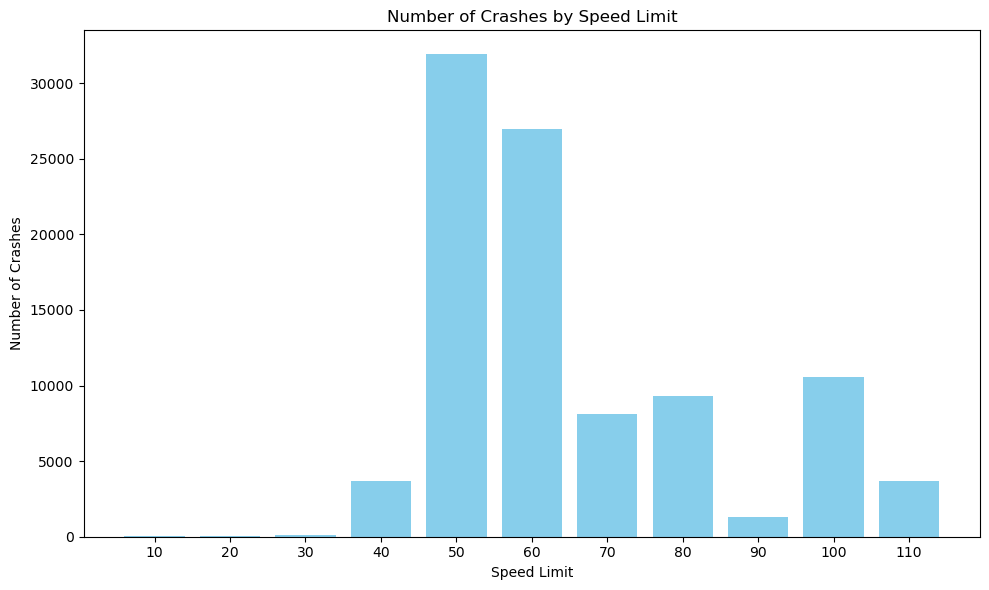

In [150]:
plot_crashes_by_speed_limit()

<span style="font-size:0.5em;">As expected from previous graphs the most common variable is the one with the largest count. Its no different here 50 and 60 km/h are the most common speed limits in NSW, however as we move further along the x-axis we can see that there are many inconsistencies with the data. Since there was no recorded data about how fast each vehicle was going, it is hard to say whether or not the accidents happening in these speed limits mean anything.</span>